# Central Limit Theorem
The distribution of sample means is normally distibuted

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon, skewnorm

In [5]:
# Get a silly non-normal distribution
def get_data(n):
    data = np.concatenate((expon.rvs(scale=1, size=n//2), skewnorm.rvs(5, loc=3, size=n//2)))
    np.random.shuffle(data)
    return data

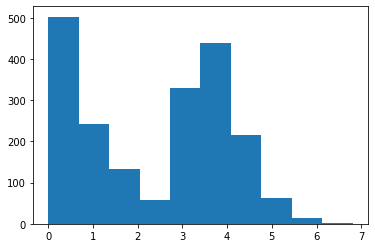

In [4]:
plt.hist(get_data(2000));

In [6]:
# Not normal, but let's collect the means
d10 = get_data(10)
print(d10.mean())

2.0310579662796107


In [11]:
# Lets get that 1000 times
means = [get_data(10).mean() for i in range(1000)]

0.26685840403284955


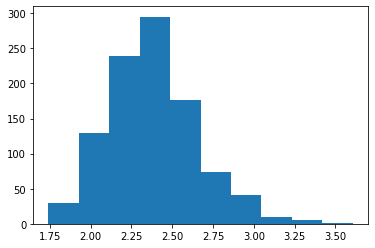

In [12]:
plt.hist(means)
print(np.std(means))

In [14]:
# A little more normal, but let's get 100 data points per person
means = [get_data(100).mean() for i in range(1000)]

0.08088498986389223


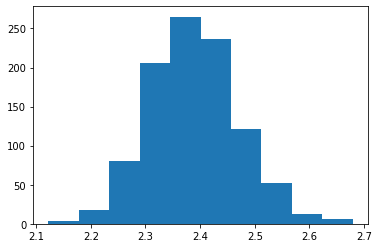

In [15]:
plt.hist(means)
print(np.std(means))

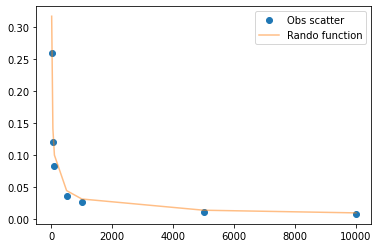

In [16]:
# Lets do that parametrically
num_samps = [10, 50, 100, 500, 1000, 5000, 10000]
stds = []
for n in num_samps:
    stds.append(np.std([get_data(n).mean() for i in range(1000)]))
plt.plot(num_samps, stds, 'o', label='Obs scatter')
plt.plot(num_samps, 1 / np.sqrt(num_samps), label='Rando function', alpha=0.5)
plt.legend();

# Recap
> Gathering 9 times more samples, reduces mean (or scatter) by sqrt(9) or 3

> The distribution of sample means approaches a normal distribution

> The width of the distribution depends on the number of samples

In [20]:
# Bring it together
n = 1000
data = get_data(n)
sample_mean = np.mean(data)
uncert_mean = np.std(data) / np.sqrt(n)
print("We have determined that the mean of the population is {} with an uncertainty of +/- {}".format(sample_mean, uncert_mean))

We have determined that the mean of the population is 2.385130684847216 with an uncertainty of +/- 0.05075866088251122
